In [3]:
from deli.dels.reaction import Reaction

In [4]:
del6 = Reaction('[#6:101]-C(=O)-O.[#7]-[*:102]>>[*:102]-N-C(=O)-[#6:101]')

In [17]:
from rdkit.Chem import rdChemReactions
rxn = rdChemReactions.ReactionFromSmarts('[#6:101]-C(=O)-O.[#7]-[*:102]>>[*:102]-N-C(=O)-[#6:101]')

In [24]:
len(rxn.RunReactants([react1, react2]))

1

In [14]:
from rdkit import Chem
react1 = Chem.MolFromSmiles('C(OC(=O)N1[C@H](CC(O)=O)CCC1)C2C=3C(C=4C2=CC=CC4)=CC=CC3')
react2 = Chem.MolFromSmiles('N[*]')
del6.react(react1)

ReactionError: Expected 2 reactants, got 1

In [11]:
boc_deprotect = Reaction('[#6](-[#6])(-[#6])(-[#6])-[#8]-[#6](=[#8])-[#7:1][*:2]'
    + '>>'
    + '[#7:1]([H])[*:2]')

In [12]:
boc_deprotect.num_reactants

1

In [13]:
from rdkit import Chem
mol = Chem.MolFromSmiles('CC(C)(C)OC(=O)NCc1ccccc1')

In [14]:
mol

In [15]:
boc_deprotect.run(mol)

In [40]:
# Initialize pipeline
pipeline = MultiReactionPipeline()

# Add reaction steps
pipeline.add_reaction(
    step=1,
    rxn_smarts="[#6:101]-C(=O)-O.[#7]-[*:102]>>[*:102]-N-C(=O)-[#6:101]",  # DEL6 link
    reactants=["reactant_1", "reactant_2"]
)

pipeline.add_reaction(
    step=2,
    rxn_smarts="[#8]=[#6](-[#8]-[#6]-[#6]1-[#6]2:[#6]:[#6]:[#6]:[#6]:[#6]:2-[#6]2:[#6]-1:[#6]:[#6]:[#6]:[#6]:2)-[#7:1][*:2]>>[#7:1]([H])[*:2]", # FMOC deprotect
    reactants=["product_1"]
)

pipeline.add_reaction(
    step=3,
    rxn_smarts="[Nh:2].[#6:3](=O)-O >>[#6:3](=O)-[N:2]", # Install benz core
    reactants=["product_2", "reactant_3"]
)

pipeline.add_reaction(
    step=4,
    rxn_smarts='[#6:0]1(-[*:1]):[#6]:[#6]:[#6:2](-[#9]):[#6:4](-[#7+](-[#8-])=[#8]):[#6]:1.[NH2:6][*:3]>>[#6:0]1(-[*:1]):[#6]:[#6]:[#6:2](-[NH:6][*:3]):[#6:4](-[#7+](-[#8-])=[#8]):[#6]:1', # SnAR replacement
    reactants=["product_3", "reactant_4"]
)

pipeline.add_reaction(
    step=5,
    rxn_smarts='[#6:0]1(-[*:1]):[#6]:[#6]:[#6:2](-[#7][*:3]):[#6:4](-[#7+](-[#8-])=[#8]):[#6]:1.[CX3H1:6](=O)[*:5]>>[#6:0]1(-[*:1]):[#6]:[#6]:[#6:2]2-[#7]([*:3])-[#6:6](-[*:5])=[#7]-[#6:4]:2:[#6]:1', # Nitro reduction + aldehyde
    reactants=["product_4", "reactant_5"]
)


# Define input molecules
inputs = {
    "reactant_1": "C(OC(=O)N1[C@H](CC(O)=O)CCC1)C2C=3C(C=4C2=CC=CC4)=CC=CC3",
    "reactant_2": "N[*]",
    "reactant_3": "OC(C1=CC=C(F)C(N(=O)=O)=C1)=O",
    "reactant_4": Chem.MolFromSmiles("NCc1ccc(-n2cccn2)cc1"),
    "reactant_5": "O=Cc1ccc2cccnc2c1"
}

# Run the pipeline
results = pipeline.run(inputs)

In [38]:
results

{1: <rdkit.Chem.rdchem.Mol at 0x7f1db02411c0>,
 2: <rdkit.Chem.rdchem.Mol at 0x7f1db0241310>,
 3: <rdkit.Chem.rdchem.Mol at 0x7f1db0241230>,
 4: <rdkit.Chem.rdchem.Mol at 0x7f1db0241a10>,
 5: <rdkit.Chem.rdchem.Mol at 0x7f1db02413f0>}

In [49]:
results_rev = {i:d for d, i in results.items()}
results_rev

{<rdkit.Chem.rdchem.Mol at 0x7f1db0242f80>: 1,
 <rdkit.Chem.rdchem.Mol at 0x7f1db0242a40>: 2,
 <rdkit.Chem.rdchem.Mol at 0x7f1db0241620>: 3,
 <rdkit.Chem.rdchem.Mol at 0x7f1db0242ea0>: 4,
 <rdkit.Chem.rdchem.Mol at 0x7f1db0242ff0>: 5}

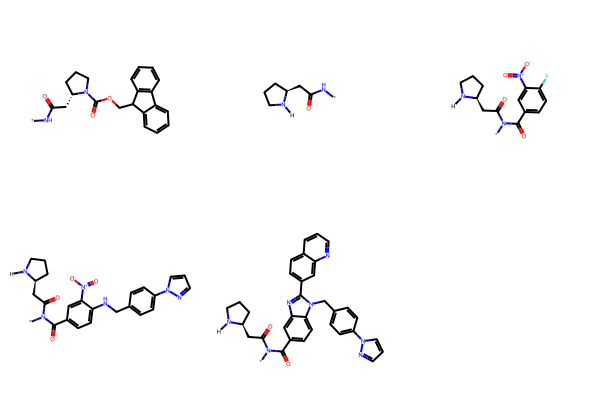

In [36]:
from rdkit.Chem import Draw
Draw.MolsToGridImage([results[i+1] for i in range(len(results))])